# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [625]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [626]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [627]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return (1 / X.shape[0]) * np.linalg.norm((X @ w - y)) ** 2
        
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return (2 / X.shape[0]) * X.T @ ((X @ w - y))
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [628]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [629]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w_cur = w_init
    ans = [w_cur]
    
    for step in range(n_iterations):
        grad = loss.calc_grad(X, y, w_cur)
        w_cur = w_cur - lr * grad
        ans.append(w_cur)
        
    return np.array(ans)


Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [630]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [631]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450264
0.8670644395649495


In [632]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(20, 10))
    plt.title("GD trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1, 
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

Значение lr: 0.001


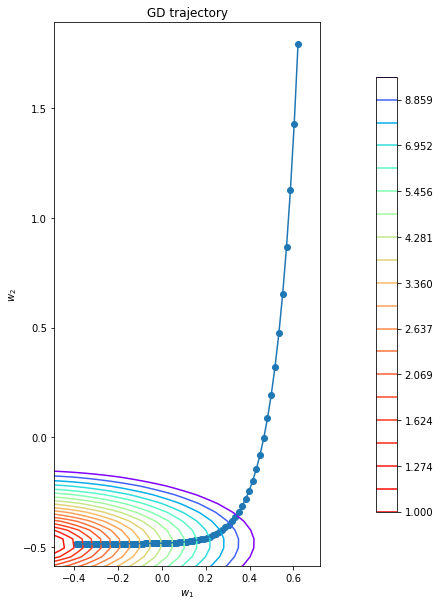

Значение lr: 0.003875


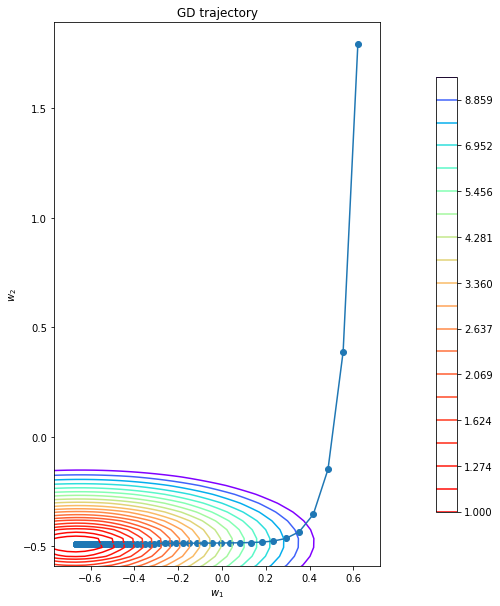

Значение lr: 0.00675


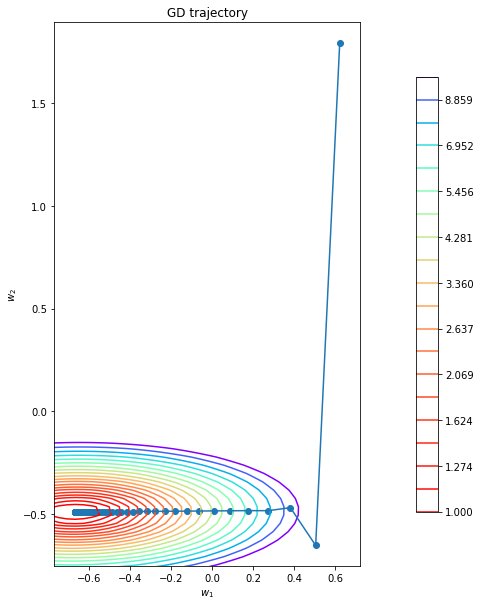

Значение lr: 0.009625000000000002


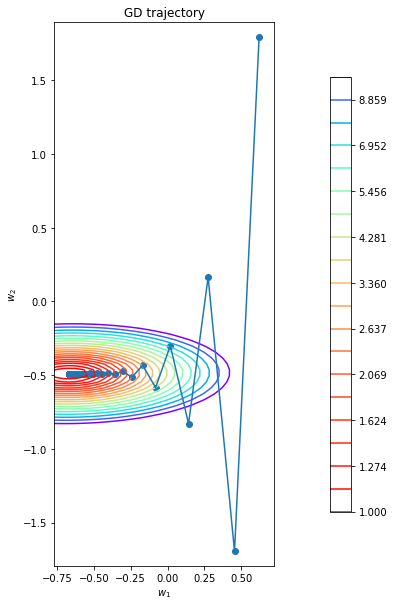

Значение lr: 0.0125


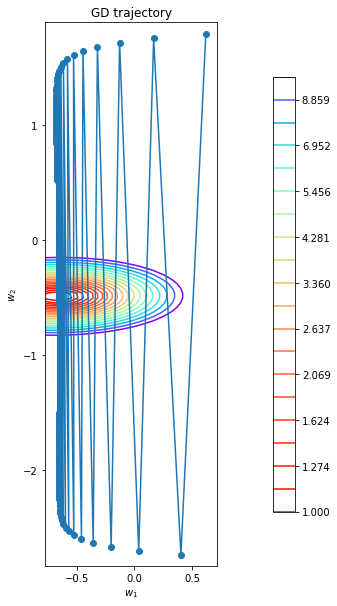

In [634]:
lr_list = np.linspace(0.001, 0.0125, 5)

for lr in lr_list:
    print('Значение lr:', lr)
    w_list = gradient_descent(w_init, X, y, loss, lr, 100)
    plot_gd(w_list, X, y, loss)

При шаге 0.001  градиентный спуск сходится к минимуму довольно плавно, однако не доходит до него

При шаге от 0.003 до 0.01 градиентный спуск коллеблется тем сильнее, чем больше шаг, однако достигает минимума при всех значениях в отрезке

При шаге 0.0125 градиентный спуск не сходится к минимуму

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [635]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    
    w_cur = w_init
    ans = [w_cur]
    
    for step in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        
        grad = loss.calc_grad(X_batch, y_batch, w_cur)
        w_cur = w_cur - lr * grad
        ans.append(w_cur)
        
    
    return np.array(ans)

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

In [520]:
#w_list = stochastic_gradient_descent(w_init, X, y, loss, lr=0.01, batch_size=10, n_iterations=100)
lr_sgd_list = np.linspace(0.001, 0.01, 5)
print('Значения lr:', *lr_sgd_list, sep='\n')
batch_sgd_list = [1, 75, 150, 225, 300]
print('Значения batch:', *batch_sgd_list, sep='\n')

Значения lr:
0.001
0.0032500000000000003
0.0055000000000000005
0.007750000000000001
0.01
Значения batch:
1
75
150
225
300


lr: 0.001
batch: 1


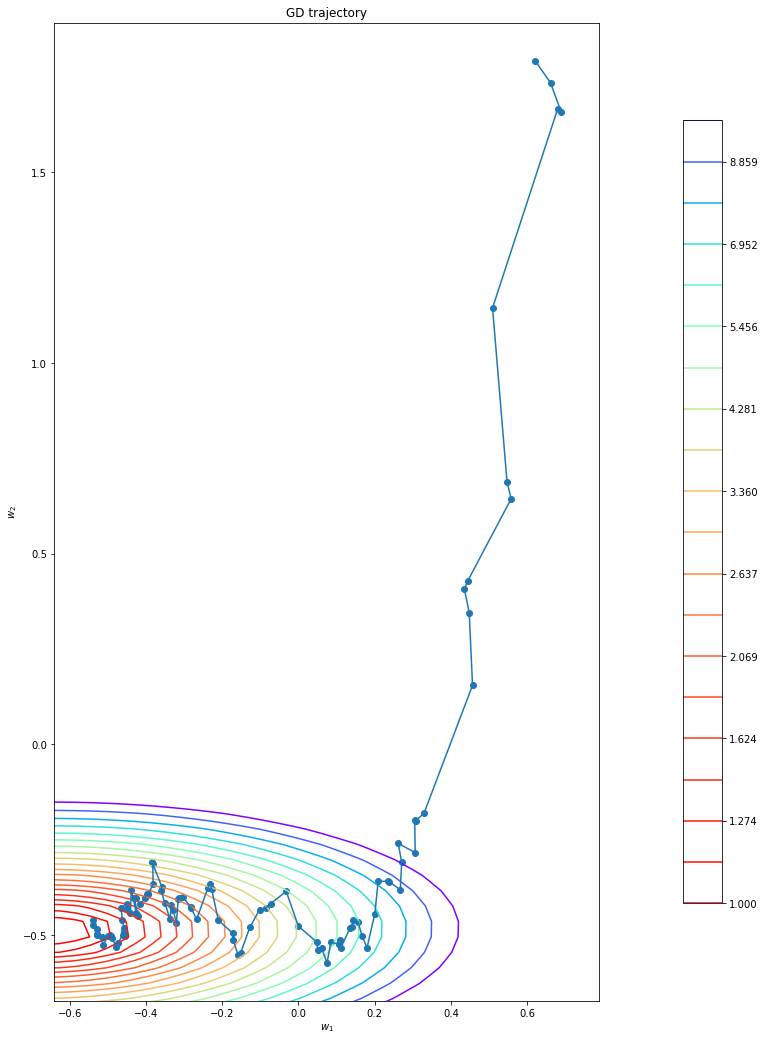

lr: 0.0032500000000000003
batch: 75


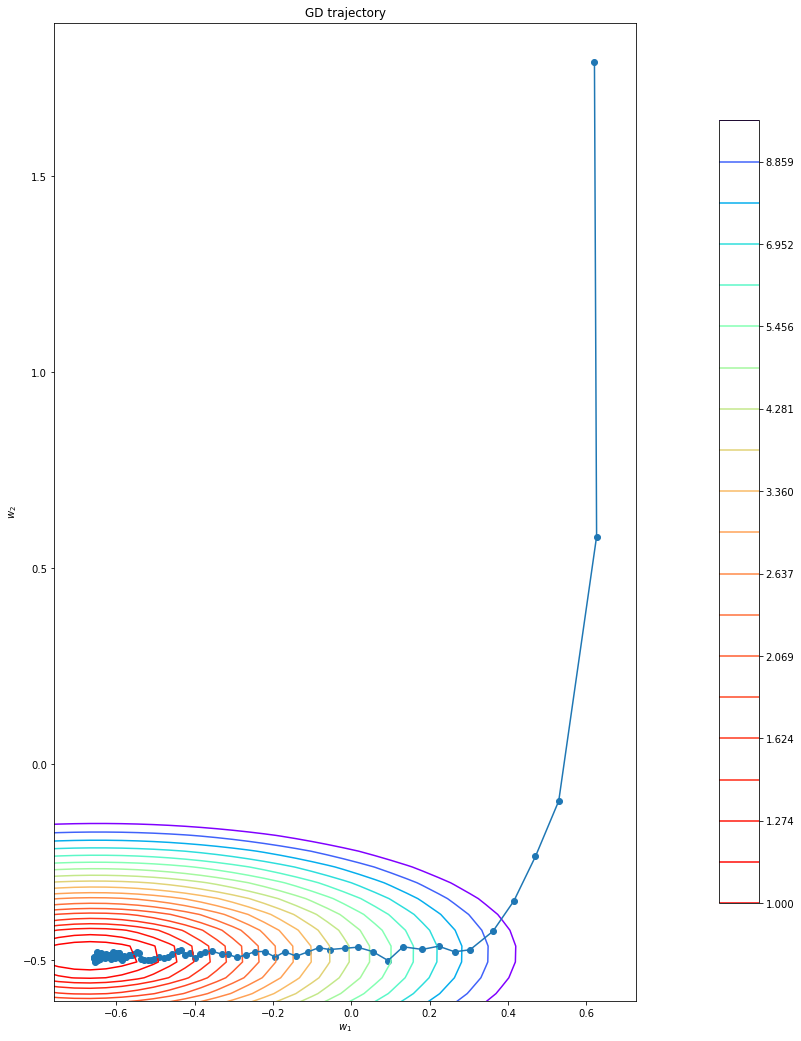

lr: 0.0055000000000000005
batch: 150


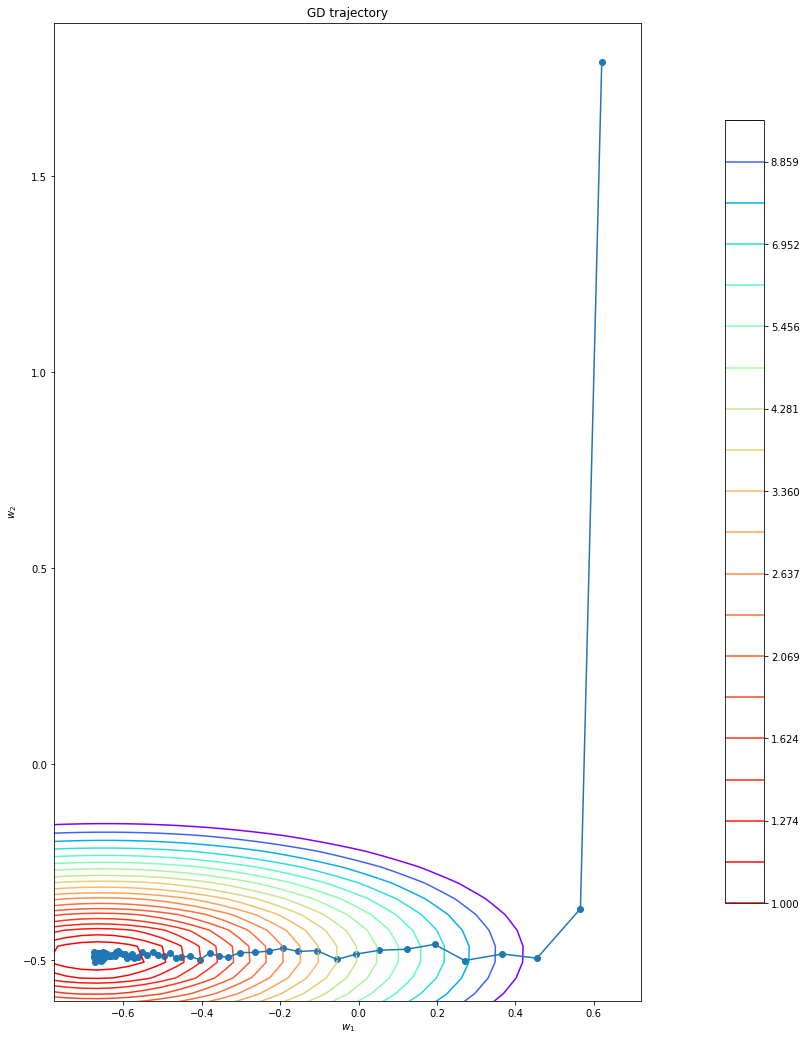

lr: 0.007750000000000001
batch: 225


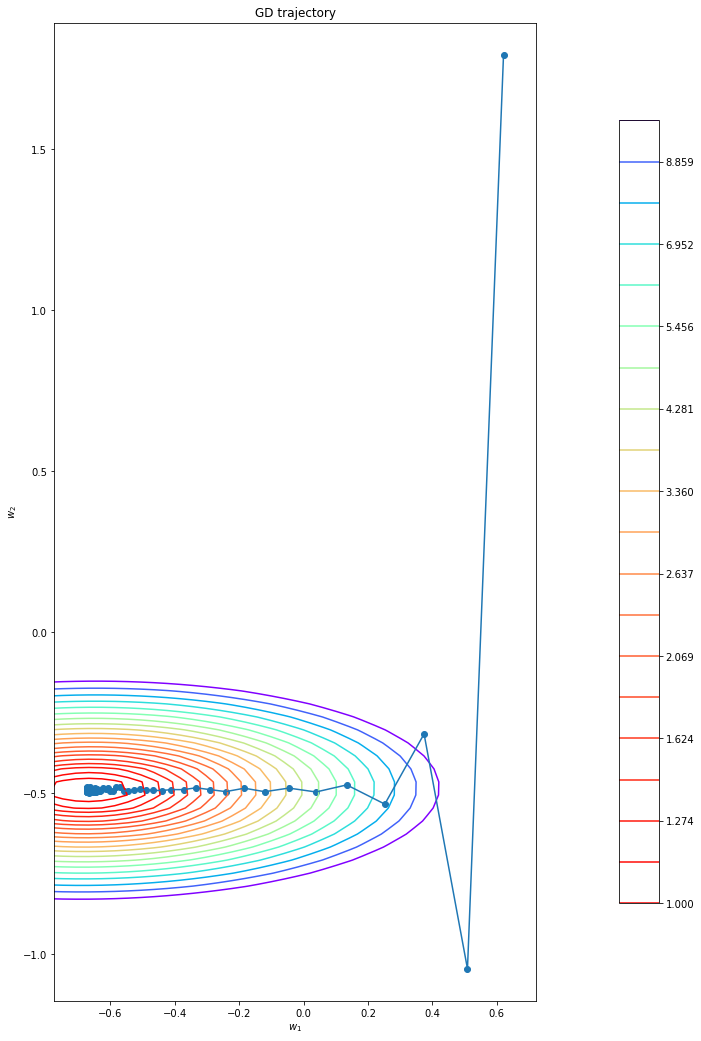

lr: 0.01
batch: 300


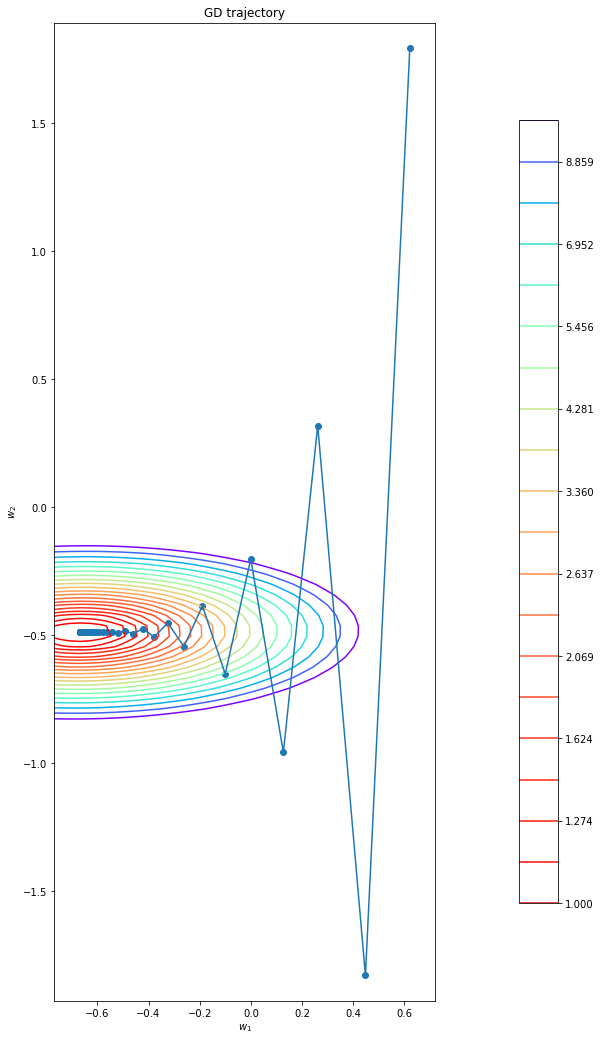

In [521]:
for lr, batch_size in zip(lr_sgd_list, batch_sgd_list):
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr=lr, batch_size=batch_size, n_iterations=100)
    print('lr:', lr)
    print('batch:', batch_size)
    plot_gd(w_list, X, y, loss)

С увеличением batch_size, трактория sgd становится более плавной.

Как и ранее, при малых размерах шага сходимость к минимуму более плавная, однако при lr <= 0.001 градиентный спуск не успевает дойти до минимума

С увеличением шага, увеличивается и амплитуда коллебаний

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [522]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    s_0 = 1
    lr_init = lr
    w_cur = w_init
    ans = [w_cur]
    
    for step in range(n_iterations):
        eta_cur = lr_init * ((s_0 / (s_0 + step)) ** p)
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        
        grad = loss.calc_grad(X_batch, y_batch, w_cur)
        w_cur = w_cur - eta_cur * grad
        ans.append(w_cur)
    return np.array(ans)

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

In [523]:
p_list = np.linspace(0.1, 1, 5)
print('Значения p:', p_list)
lr_sgd = 0.01
batch_size = 10

Значения p: [0.1   0.325 0.55  0.775 1.   ]


Значение p: 0.1


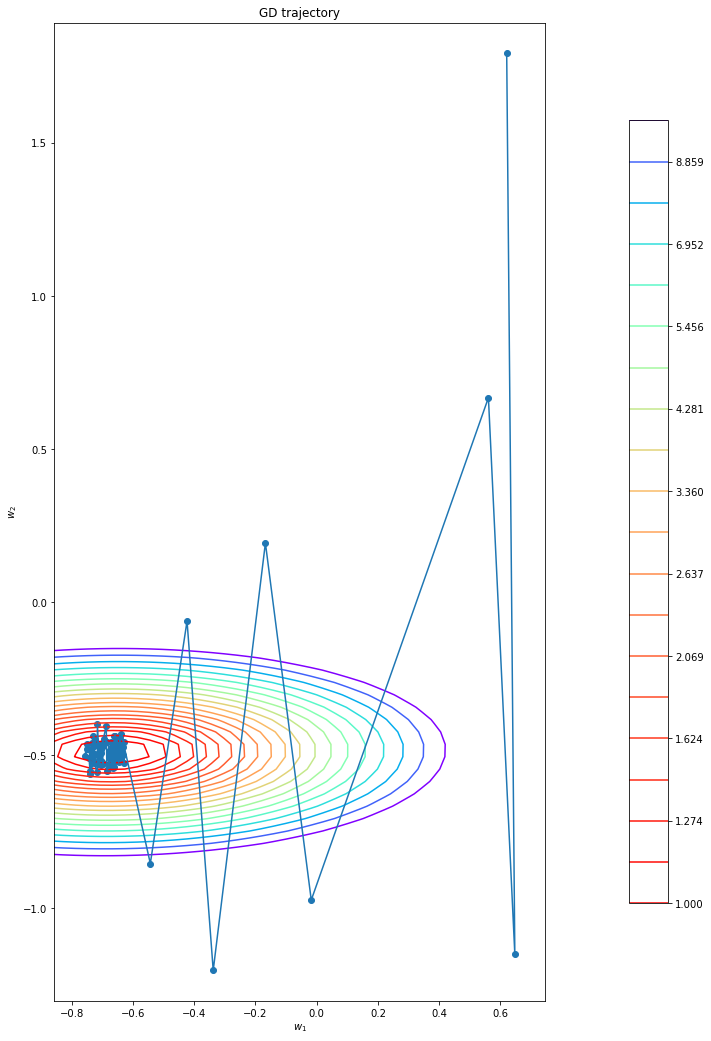

Значение p: 0.325


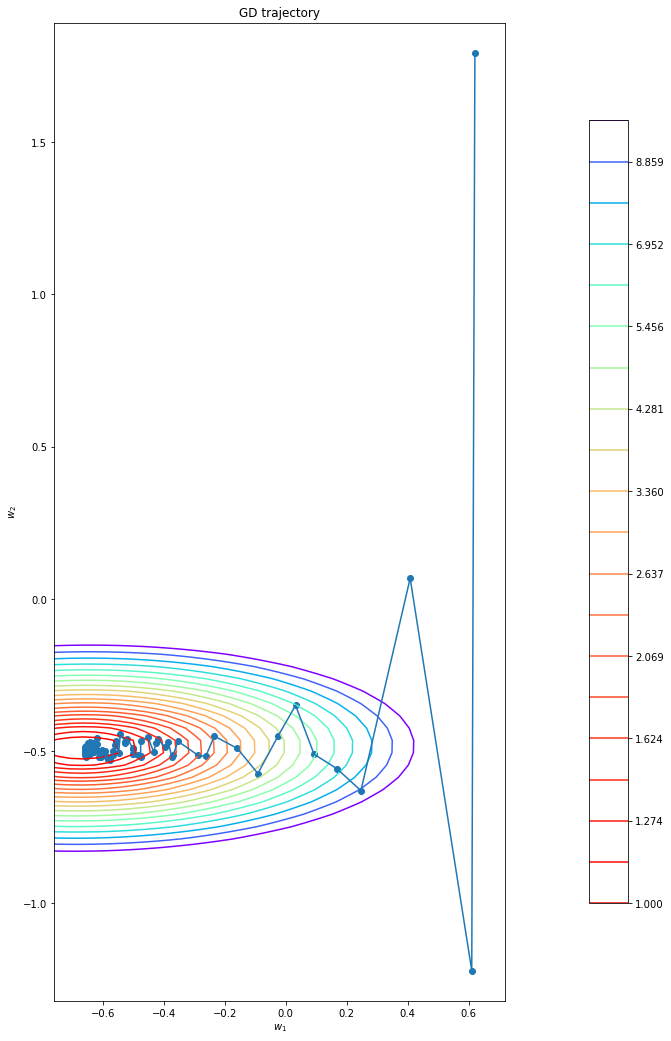

Значение p: 0.55


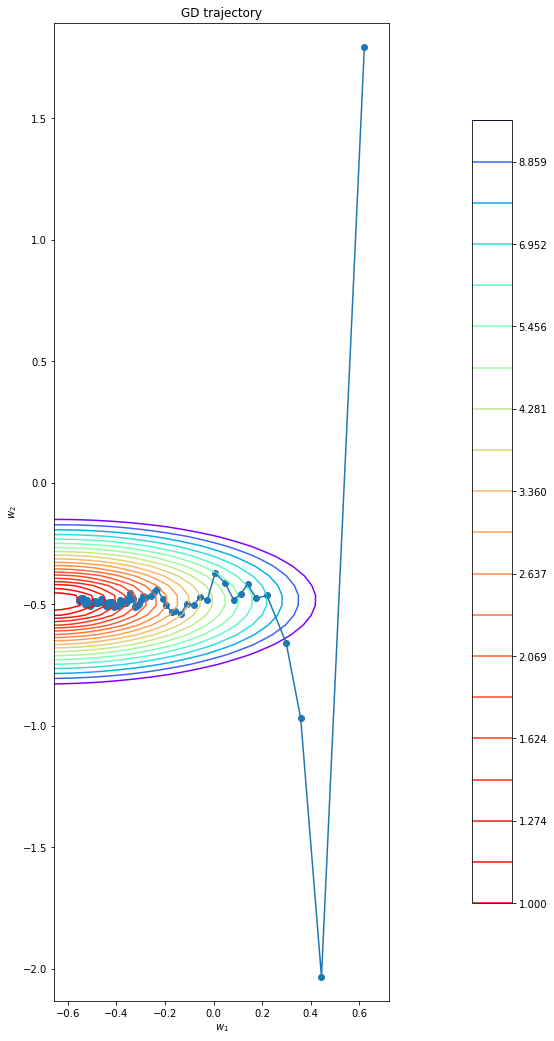

Значение p: 0.775


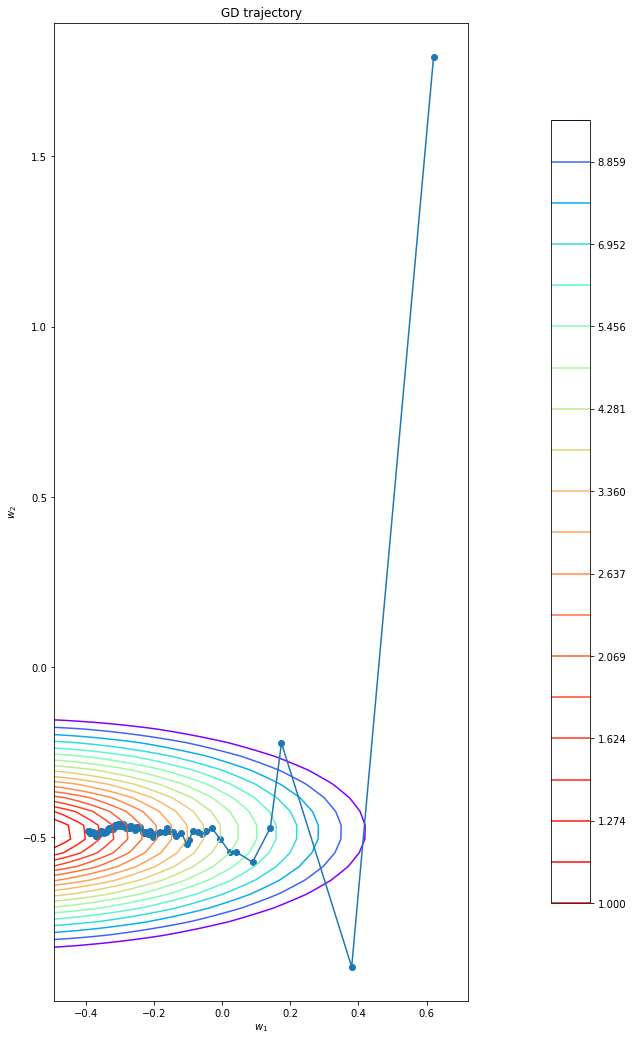

Значение p: 1.0


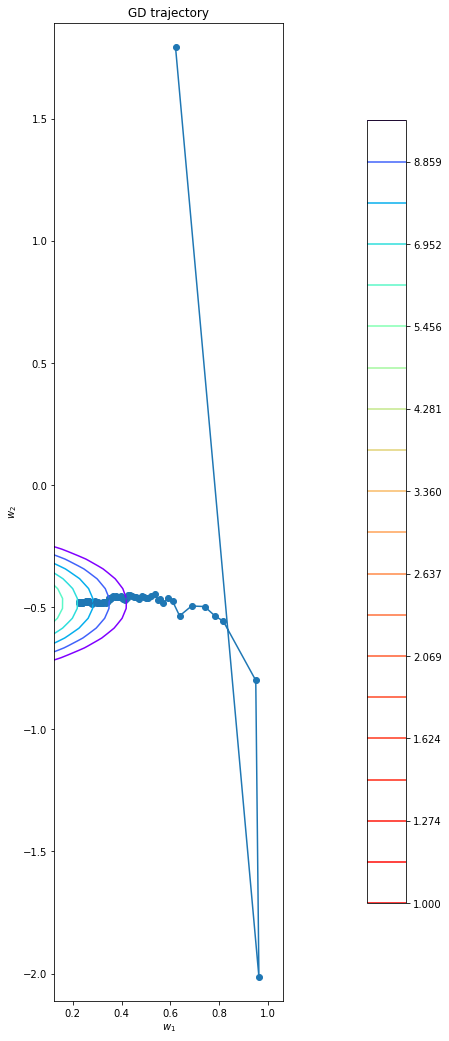

In [524]:
for p in p_list:
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr=lr_sgd, batch_size=batch_size, p=p, n_iterations=100)
    print('Значение p:', p)
    plot_gd(w_list, X, y, loss)

При малых p уменьшение шага с номером итерации является незначительным. Поэтому при относительно большом размере шага lr = 0.01 и малом размере выборки batch_size = 10, sgd не сходится к минимуму, а коллеблется около него 

При 0.4 < p < 0.5 амплитуда коллебаний после 5 итераций становится значительно меньше и sgd сходится к минимуму

При p > 0.5 sgd сходится к минимуму намного более плавно, однако из-за большого штрафа на каждой новой итерации, не успевает до него дойти

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

In [525]:
w_init = w_init
n_iterations = 100
lr = 0.01
batch_size = 10
p = 0.5

In [526]:
w_list_full_gd = gradient_descent(w_init, X, y, loss, lr=lr, n_iterations=n_iterations)

In [527]:
w_list_sgd = stochastic_gradient_descent(w_init, X, y, loss, lr=lr, batch_size=batch_size, p=p, n_iterations=n_iterations)

In [528]:
full_gd_loss = [loss.calc_loss(X, y, w_full_gd) for w_full_gd in w_list_full_gd]
sgd_loss = [loss.calc_loss(X, y, w_sgd) for w_sgd in w_list_sgd]

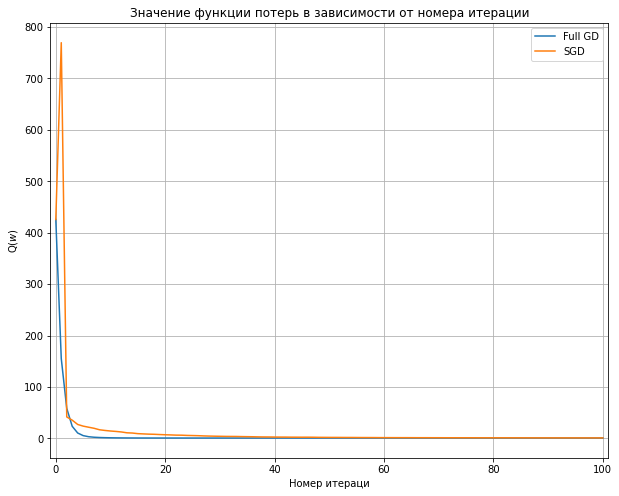

In [529]:
plt.figure(figsize=(10, 8))
plt.plot(range(n_iterations + 1), full_gd_loss, label='Full GD')
plt.plot(range(n_iterations + 1), sgd_loss, label='SGD')

plt.title('Значение функции потерь в зависимости от номера итерации')
plt.xlim((-1, n_iterations + 1))
plt.legend()
plt.xlabel('Номер итераци')
plt.ylabel(r'Q($w$)')
plt.grid()
plt.show()

В общем случае, полный градиентный спуск сходится к минимуму более плавно.

В силу того, что выборка состоит всего из 300 элементов, огромную роль в скорости сходимости играет конкретный набор элементов, который попал в batch. По этой причине, при определенных значениях, SGD может сходиться к минимуму быстрее (по количеству итераций), чем Full GD.

В общем случае, SGD по времени сходится к минимуму быстрее, чем Full GD, однако в нашем случае данное преимущество не является принципиальным, так как в датасете всего 300 объектов.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [530]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.01) -> None:
        self.loss = loss
        self.lr = lr
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        w_init = np.random.uniform(-2, 2, (X.shape[1]))
        self.w = gradient_descent(w_init, X, y, self.loss, self.lr, n_iterations=1000)[-1]
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])]) 
        return X @ self.w
    

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [531]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [532]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None, 
    na_values=["?"],
    index_col=0
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [533]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

In [534]:
X_raw

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27


**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [535]:
X_raw.isnull().sum()

0      0
1     37
2      0
3      0
4      0
5      2
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     4
19     4
20     0
21     2
22     2
23     0
24     0
dtype: int64

In [536]:
from sklearn.impute import SimpleImputer

In [537]:
cat_features_mask = (X_raw.dtypes == 'object').values

In [538]:
X_real = X_raw[X_raw.columns[~cat_features_mask]]
miss_imputer = SimpleImputer(strategy='mean')
X_real_no_miss = pd.DataFrame(miss_imputer.fit_transform(X_real), columns=X_real.columns)
X_proc = pd.concat([X_real_no_miss, X_raw[X_raw.columns[cat_features_mask]].fillna('')], axis=1)

In [539]:
X_proc.isnull().any().any()

False

In [540]:
X_final = pd.get_dummies(X_proc, drop_first=True)

In [541]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, train_size=0.7, random_state=123)

In [542]:
from sklearn import preprocessing

normalizer = preprocessing.StandardScaler()

X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [543]:
linear_regression.fit(X_train_norm, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [544]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred_train = linear_regression.predict(X_train_norm)
y_pred_test = linear_regression.predict(X_test_norm)
print('MSE на train', mean_squared_error(y_train, y_pred_train))
print('MSE на test', mean_squared_error(y_test, y_pred_test))

print(r2_score(y_test, y_pred_test))

MSE на train 1981088.478562347
MSE на test 5685020.874704105
0.8292982095631884


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [545]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        sub_w = w[:-1]
        return (1 / X.shape[0]) * (np.linalg.norm((X @ w - y)) ** 2) + self.coef * (np.linalg.norm(sub_w) ** 2)
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        og_grad = (2 / X.shape[0]) * X.T @ ((X @ w - y))
        su_w = np.append(w[:-1], 0)
        return og_grad + 2 * self.coef * su_w
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [546]:
linear_regression = LinearRegression(MSEL2Loss(1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [547]:
for alpha in [0.05, 1, 10, 100]:
    linear_regression = LinearRegression(MSEL2Loss(alpha))
    linear_regression.fit(X_train_norm, y_train)
    
    y_pred_train = linear_regression.predict(X_train_norm)
    y_pred_test = linear_regression.predict(X_test_norm)

    print('alpha:', alpha)
    print('MSE на train', mean_squared_error(y_train, y_pred_train))
    print('MSE на test', mean_squared_error(y_test, y_pred_test))

    print(r2_score(y_test, y_pred_test))
    print()

alpha: 0.05
MSE на train 2314347.1153758825
MSE на test 5495469.288251996
0.834989797316452

alpha: 1
MSE на train 6287667.44309395
MSE на test 7973339.0295739025
0.7605878187423867

alpha: 10
MSE на train 25412346.694068965
MSE на test 16798007.488218177
0.4956131178394211

alpha: 100
MSE на train 4.862197188389376e+180
MSE на test 2.979643746029023e+180
-8.946854084110566e+172



Добиться лучших значений ошибки на тесте получается только при коэффициентах регуляризации alpha < 0.1, однако они все еще сопоставимы с обычной линейной регрессией. 

При alpha = 1, разница ошибок на трейне и тесте становится значительно меньше (пропадает признак переобучения), однако в абсолютном выражении обе ошибки больше, чем для обычной линейной регргессии

При alpha >= 10, ошибки становятся на порядок больше

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [548]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        z = abs(X @ w - y)
        ans = np.zeros(len(z))
        ans[z < self.eps] = (1 / X.shape[0]) * 0.5 * ((X @ w)[z < self.eps] - y[z < self.eps]) ** 2
        ans[z >= self.eps] = (1 / X.shape[0]) * self.eps * (abs((X @ w)[z >= self.eps] - y[z >= self.eps]) - 0.5 * self.eps)
        return sum(ans)
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        z = abs(X @ w - y)
        grad_ans = np.zeros(len(z))
        grad_ans[z < self.eps] = (1 / X.shape[0]) * ((X @ w)[z < self.eps] - y[z < self.eps])
        grad_ans[z >= self.eps] = (1 / X.shape[0]) * (self.eps * np.sign((X @ w)[z >= self.eps]) - y[z >= self.eps])
        return X.T @ grad_ans 
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [549]:
for eps in [0, 3000, 6000, 10000, 100000, 1000000]:
    linear_regression = LinearRegression(HuberLoss(eps))
    linear_regression.fit(X_train_norm, y_train)
    
    y_pred_train = linear_regression.predict(X_train_norm)
    y_pred_test = linear_regression.predict(X_test_norm)

    print('eps:', eps)
    print('MSE на train', mean_squared_error(y_train, y_pred_train))
    print('MSE на test', mean_squared_error(y_test, y_pred_test))

    print(r2_score(y_test, y_pred_test))
    print()

eps: 0
MSE на train 714287599863.3615
MSE на test 383029515178.5285
-11500.07017584554

eps: 3000
MSE на train 230715583603.9499
MSE на test 112318958625.6118
-3371.555309814587

eps: 6000
MSE на train 2214745.31387819
MSE на test 6275871.477330194
0.8115569808198213

eps: 10000
MSE на train 2272843.6029785927
MSE на test 5766860.182418371
0.826840854231901

eps: 100000
MSE на train 2307915.7863476947
MSE на test 5769090.526086343
0.8267738846172236

eps: 1000000
MSE на train 2307501.655343645
MSE на test 5769368.332872122
0.8267655430267926



При eps < 6000 ошибка для регрессии обученной с HuberLoss на несколько порядков больше ошибки для регрессии, обученной MSELoss (увеличивается с уменьшением eps)

При eps >= 6000 ошибка для регрессии обученной с HuberLoss имеет значения, сопоставимые с ошибкой для регрессии, обученной MSELoss и практически не меняется для данных значений эпсилон.

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

https://i.pinimg.com/236x/48/10/bb/4810bb7842f17961e1b4c99d650c0283.jpg

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [653]:
def algo(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
         loss: BaseLoss, temp_init: float, n_iterations: int) -> List[np.ndarray]:
    
    k = 1
    old_w = w_init
    temp_cur = temp_init
    ans = [old_w]

    for step in range(n_iterations):
        
        temp_cur = temp_init / k
        new_w = old_w + np.random.standard_t(3, size=old_w.shape)
        
        if loss.calc_loss(X, y, new_w) > loss.calc_loss(X, y, old_w):
            prob = np.exp((1 / temp_cur) * (loss.calc_loss(X, y, old_w) - loss.calc_loss(X, y, new_w)))
            rand = np.random.binomial(1, prob)
            new_w = (1 - rand) * old_w + rand * new_w
            ans.append(new_w)
        else:
            old_w = new_w
            ans.append(old_w)
        k += 1
        
    return np.array(ans)

In [654]:
w_init = np.arange(X_train_norm.shape[1])
temp_init = 10
n_iterations = 1000
loss = MSELoss()
n_features = 65
n_objects = 140

In [655]:
w_list = algo(w_init=w_init, X=X_train_norm, y=y_train, loss=loss, temp_init=temp_init, n_iterations=n_iterations)

In [656]:
w_list

array([[  0.        ,   1.        ,   2.        , ...,  62.        ,
         63.        ,  64.        ],
       [  0.        ,   1.        ,   2.        , ...,  62.        ,
         63.        ,  64.        ],
       [  0.        ,   1.        ,   2.        , ...,  62.        ,
         63.        ,  64.        ],
       ...,
       [ -4.7466744 ,  43.61410205, 124.77315466, ..., 184.77618882,
          8.25857228,  26.16668378],
       [ -4.7466744 ,  43.61410205, 124.77315466, ..., 184.77618882,
          8.25857228,  26.16668378],
       [ -4.7466744 ,  43.61410205, 124.77315466, ..., 184.77618882,
          8.25857228,  26.16668378]])

In [657]:
loss.calc_loss(X_train_norm, y_train, w_list[-1])

239908420.04653534

In [659]:
plot_gd(w_list=w_list, X=X_train_norm, y=y_train, loss=loss)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 65)